In [1]:
# Importing Libraries
import pandas as pd  # Reading Data
from sklearn.naive_bayes import MultinomialNB  # The Prediciton Model
from sklearn.feature_extraction.text import CountVectorizer  # The transforming To Vector Tool
from sklearn.pipeline import Pipeline  # Runing Line by line Tool
from sklearn.model_selection import train_test_split  # spiliting tool
from sklearn.metrics import confusion_matrix, accuracy_score  # visualization
import matplotlib.pyplot as plt  # visualization
import seaborn as sn  # visualization

In [10]:
# Reading The Data
data = pd.read_csv("Data/spam.csv", encoding='latin1')

# droping other columns
data = data[["v1", "v2"]]

# Rename The spam and message columns
data.rename(columns={"v1": "spamORham", "v2": "Message"}, inplace=True)

# Displaying the dataframe
data.head()

,spamORham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Changing the ham & spam to 0,1 To be readable for the model
data["spam"] = data["spamORham"].replace(to_replace=["ham", "spam"], value=[0, 1])

# droping old coulmn
data = data.drop("spamORham", axis=1)

# Displaying the dataframe
data.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
# Spiliting The Data to train and test
x_train, x_test, y_train, y_test = train_test_split(data.Message, data.spam, train_size=.8, random_state=1000)

In [5]:
# Writing Steps in a model to fiting them using Pipeline
clf = Pipeline([('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [6]:
# training the model
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Accuracy: 98.39%


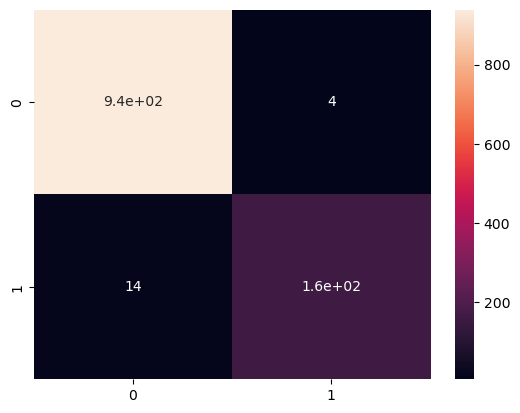

In [7]:
# making prediction of the test
y_pred = clf.predict(x_test)

# The model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# visualization
CM = confusion_matrix(y_test, y_pred)
sn.heatmap(CM, annot=True)
plt.show()

In [8]:
# Predicting manual
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1], dtype=int64)

In [9]:
# GUI
import ipywidgets as widgets
from IPython.display import display

# Define a function to be called when the button is clicked
def on_button_click(b):
    text_value = text_box.value
    if clf.predict([text_value]) == 1:
        email = "Spam"
    else:
        email = "Ham"

    print("Email is : ", email)

# Create button and text box widgets
button = widgets.Button(description="PREDICT")
text_box = widgets.Text(placeholder="Enter Email")
text_box.layout.width = '500px'
text_box.layout.height = '30px'

# Attach the function to the button click event
button.on_click(on_button_click)

# Display the widgets
display(text_box)
display(button)

Text(value='', layout=Layout(height='30px', width='500px'), placeholder='Enter Email')

Button(description='PREDICT', style=ButtonStyle())